<a href="https://colab.research.google.com/github/girijatandon/Stock-Market-Prediction/blob/main/Stock_Market_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# New Section

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/


cp: cannot stat 'kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d jainilcoder/netflix-stock-price-prediction

Dataset URL: https://www.kaggle.com/datasets/jainilcoder/netflix-stock-price-prediction
License(s): CC0-1.0
netflix-stock-price-prediction.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/netflix-stock-price-prediction.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import seaborn as sns



In [ ]:
!pip install quandl
import quandl

In [ ]:
df = pd.read_csv('/content/NFLX.csv')

In [ ]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900
...,...,...,...,...,...,...,...
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,405.600006,9905200


In [ ]:
df.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


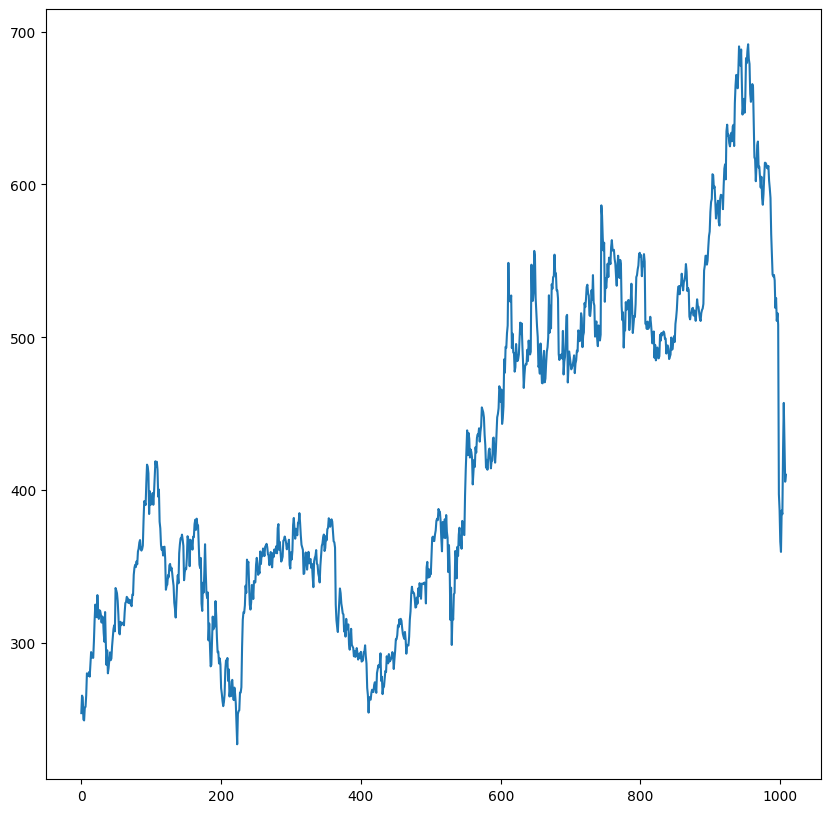

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(df['Close'],label='Closing Price')

Classification Problem : Buy or Sell the stock

In [ ]:
df['Open - Close'] = df['Open'] - df['Close']
df['High - Low'] = df['High'] - df['Low']
df = df.dropna()

Input Feature to predict whether customer should buy or sell the stock


In [ ]:
X = df[['Open','High','Low','Volume']]
X.head()

,Open,High,Low,Volume
0,262.000000,267.899994,250.029999,11896100
1,247.699997,266.700012,245.000000,12595800
2,266.579987,272.450012,264.329987,8981500
3,267.079987,267.619995,250.000000,9306700
4,253.850006,255.800003,236.110001,16906900


Intention is to store 1 for the Buy signal and 0 for the sell signal .The target variable is "Y"  for Classification task

In [ ]:
Y = np.where(df['Close'].shift(-1) > df['Close'],1,0)

In [ ]:
Y

array([1, 0, 0, ..., 0, 1, 0])

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2 , random_state = 42)

Implementation of KNN Classifier

In [ ]:
from sklearn.neighbors import  KNeighborsClassifier
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score


params = {'n_neighbors': [1,2,3,4,5,6,7,8,9]}
knn = neighbors.KNeighborsClassifier()
model = GridSearchCV(knn,params,cv=5)

model.fit(X_train,Y_train)

accuracy_train = accuracy_score(Y_train,model.predict(X_train))
accuracy_test = accuracy_score(Y_test,model.predict(X_test))

print("train_data Accuracy: %.2f" %accuracy_train)
print("test_data Accuracy: %.2f" %accuracy_test)

train_data Accuracy: 0.75
test_data Accuracy: 0.49


In [ ]:
predications_classification = model.predict(X_test)

In [ ]:
actual_predicated_data = pd.DataFrame({'Actual Class':Y_test,'Predicted Class':predications_classification})

In [ ]:
actual_predicated_data.head(10)

,Actual Class,Predicted Class
0,0,0
1,0,1
2,0,1
3,0,0
4,0,1
5,1,0
6,0,1
7,1,1
8,0,0
9,0,1


In [ ]:
y = df['Close']

In [ ]:
y

,Close
0,254.259995
1,265.720001
2,264.559998
3,250.100006
4,249.470001
...,...
1004,427.140015
1005,457.130005
1006,429.480011
1007,405.600006


In [ ]:

from sklearn.neighbors import KNeighborsRegressor
from sklearn import neighbors

X_train_reg,X_test_reg,y_train_reg,y_test_reg = train_test_split(X,y,test_size=0.2 , random_state = 42)

params = {'n_neighbors': [1,2,3,4,5,6,7,8,9]}
knn = neighbors.KNeighborsRegressor()
model_reg = GridSearchCV(knn,params,cv=5)

model_reg.fit(X_train_reg,y_train_reg)
predictions = model_reg.predict(X_test_reg)

In [ ]:
print(predictions)

[428.26889711 380.23889156 535.41222133 453.96221922 328.94223022
 327.55110333 438.43777789 373.63555911 384.879998   429.59000656
 474.33334    359.81666733 491.79999122 407.34444156 321.33999967
 535.01555711 426.36110767 557.12666833 352.27666911 321.33999967
 417.97333456 353.598894   373.39666744 372.76666756 419.276669
 311.94444444 424.58110889 376.98221856 399.36555656 557.94445122
 510.49554778 449.63443678 353.964447   374.71333467 517.23222189
 342.44111289 424.61222656 357.21777844 337.42888722 359.05443989
 373.39221867 422.13333133 435.13444022 557.12666833 406.851108
 385.86888967 403.77555678 358.10666911 347.81999367 552.32333711
 376.98221856 359.81666733 422.13333133 380.23889156 342.82221822
 426.83222467 438.96221911 338.36666867 336.65333544 402.16666333
 591.856676   417.97333456 411.84666622 422.18110833 552.65000411
 399.36555656 449.63443678 405.81110989 414.34444178 512.37777033
 333.51111511 378.02000256 376.09444167 349.52000256 429.59000656
 374.71333467 

In [ ]:
res=np.sqrt(np.mean(np.power((np.array(y_test_reg)-np.array(predictions)),2)))
print(res)



90.8527957262655


In [ ]:
valid = pd.DataFrame({'Actual Close':y_test_reg, 'Predicted Close value': predictions })

In [ ]:
valid.head(10)

,Actual Close,Predicted Close value
628,509.640015,428.268897
631,494.730011,380.238892
741,500.859985,535.412221
514,380.070007,453.962219
365,315.100006,328.942230
656,476.260010,327.551103
657,495.989990,438.437778
530,298.839996,373.635559
321,359.309998,384.879998
70,328.190002,429.590007
